<a href="https://colab.research.google.com/github/zia207/Deep-Neural-Network-Satellite-Image-Classification-in-Google-Colaboratory-iPython-Note-Book-/blob/master/Keras_R_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Neural Network with Keras-Tensorflow with R in Google Colab

BY Zia Ahmed, Univertsity At Buffalo

R is a programming language commonly used for statistical analysis, data visualization, and data manipulation. Google Colab, on the other hand, is a cloud-based platform that allows you to run and collaborate on Jupyter notebooks.

Although Google Colab is primarily designed for Python, it also supports R. You can run R code in a Colab notebook by creating an R runtime environment. Here's how you can set it up:

1. Open Google Colab in your web browser at https://colab.research.google.com/.

2. Click on the "File" menu and select "New notebook" to create a new notebook.

3. In the toolbar, click on the "Runtime" menu and select "Change runtime type."

4. In the dialog box that appears, select "R" from the "Runtime type" dropdown.

5. Click on the "Save" button to apply the changes.

Once you have set up the R runtime environment, you can start writing and executing R code in the notebook cells. To run a code cell, press Shift+Enter or click on the "Play" button next to the cell.

You can install R packages in Colab by using the **install.packages()** function.

[Keras](https://keras.io/) is a popular high-level deep learning library that provides a convenient and user-friendly API for building and training deep learning models. [TensorFlow](https://www.tensorflow.org/) is a powerful open-source deep learning framework that serves as the backend for Keras and provides efficient computation for training and running deep learning models.

While Keras is primarily known for its Python implementation, it also has support for other programming languages, including R. In R, you can use the [keras package](https://posit.co/blog/keras-for-r/) which provides an interface to the Keras library with [TensorFlow](https://tensorflow.rstudio.com/)



We can use **print(installed.packages())** to find Find (or retrieve) details of all packages installed in the specified libraries.

In [ ]:
 print(installed.packages())

### Installation
The packages [tidymodel](https://www.tidymodels.org/) and [keras](https://tensorflow.rstudio.com/) are not installed in google colab. We have install these packages.  

In [3]:
install.packages("tidymodels")
install.packages("keras")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘Rcpp’, ‘diagram’, ‘lava’, ‘listenv’, ‘parallelly’, ‘prodlim’, ‘future’, ‘warp’, ‘iterators’, ‘lhs’, ‘DiceDesign’, ‘patchwork’, ‘globals’, ‘clock’, ‘gower’, ‘ipred’, ‘timeDate’, ‘furrr’, ‘slider’, ‘foreach’, ‘GPfit’, ‘modelenv’, ‘dials’, ‘hardhat’, ‘infer’, ‘modeldata’, ‘parsnip’, ‘recipes’, ‘rsample’, ‘tune’, ‘workflows’, ‘workflowsets’, ‘yardstick’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppTOML’, ‘here’, ‘png’, ‘config’, ‘tfautograph’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’




### Load Library

In [4]:
library(tidymodels)
library(tidyverse)
library(keras)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.0 ──

✔ broom        1.0.5     ✔ recipes      1.0.6
✔ dials        1.2.0     ✔ rsample      1.1.1
✔ dplyr        1.1.2     ✔ tibble       3.2.1
✔ ggplot2      3.4.2     ✔ tidyr        1.3.0
✔ infer        1.0.4     ✔ tune         1.1.1
✔ modeldata    1.1.0     ✔ workflows    1.1.3
✔ parsnip      1.1.0     ✔ workflowsets 1.0.1
✔ purrr        1.0.1     ✔ yardstick    1.2.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ lubridate 1.9.2     ✔ stringr   1.5.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::

In [6]:
mf<-read_csv("/content/sample_data/gp_soil_data_syn.csv")

Rows: 1408 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): NLCD, FRG
dbl (8): ID, SOC, DEM, Slope, TPI, MAP, MAT, NDVI

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
df<-mf %>% dplyr::select(SOC, DEM, Slope,  TPI, MAT, MAP,NDVI, NLCD, FRG)%>%
    glimpse()

Rows: 1,408
Columns: 9
$ SOC   <dbl> 1.900, 2.644, 0.800, 0.736, 15.641, 8.818, 3.782, 6.641, 4.803, …
$ DEM   <dbl> 2825.1111, 2535.1086, 1716.3300, 1649.8933, 2675.3113, 2581.4839…
$ Slope <dbl> 18.981682, 14.182393, 1.585145, 9.399726, 12.569353, 6.358553, 1…
$ TPI   <dbl> -0.91606224, -0.15259802, -0.39078590, -2.54008722, 7.40076303, …
$ MAT   <dbl> 4.709227, 4.648000, 6.360833, 10.265385, 2.798550, 6.358550, 7.0…
$ MAP   <dbl> 613.6979, 597.7912, 201.5091, 298.2608, 827.4680, 679.1392, 508.…
$ NDVI  <dbl> 0.6845260, 0.7557631, 0.2215059, 0.2785148, 0.7337426, 0.7017139…
$ NLCD  <chr> "Forest", "Forest", "Shrubland", "Shrubland", "Forest", "Forest"…
$ FRG   <chr> "Fire Regime Group IV", "Fire Regime Group IV", "Fire Regime Gro…


### Data Pre-Processing

In [10]:
dataset <- recipe(SOC ~ ., data = df) %>%
  step_zv(all_predictors()) %>%
  step_dummy(all_nominal()) %>%
  prep() %>%
  bake(new_data = NULL) %>%
  glimpse()

Rows: 1,408
Columns: 15
$ DEM                       <dbl> 2825.1111, 2535.1086, 1716.3300, 1649.8933, …
$ Slope                     <dbl> 18.981682, 14.182393, 1.585145, 9.399726, 12…
$ TPI                       <dbl> -0.91606224, -0.15259802, -0.39078590, -2.54…
$ MAT                       <dbl> 4.709227, 4.648000, 6.360833, 10.265385, 2.7…
$ MAP                       <dbl> 613.6979, 597.7912, 201.5091, 298.2608, 827.…
$ NDVI                      <dbl> 0.6845260, 0.7557631, 0.2215059, 0.2785148, …
$ SOC                       <dbl> 1.900, 2.644, 0.800, 0.736, 15.641, 8.818, 3…
$ NLCD_Herbaceous           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,…
$ NLCD_Planted.Cultivated   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ NLCD_Shrubland            <dbl> 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ FRG_Fire.Regime.Group.II  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,…
$ FRG_Fire.Regime.Group.III <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,…
$ FRG_Fire.Regim

### Split the data into training and test sets

In [11]:
split <- initial_split(dataset, 0.8, strata = SOC)
train_dataset <- training(split)
test_dataset <- testing(split)

### Split features from labels (SOC)

Separate the target or response value---the "label" (SOC) from the features. This label is the value that you will train the model to predict

In [12]:
train_features <- train_dataset %>% select(-SOC)
test_features <- test_dataset %>% select(-SOC)

train_labels <- train_dataset %>% select(SOC)
test_labels <- test_dataset %>% select(SOC)

### Data Normalization

It is good practice to normalize features that use different scales and ranges.

One reason this is important is because the features are multiplied by the model weights. So, the scale of the outputs and the scale of the gradients are affected by the scale of the inputs.

Although a model *might* converge without feature normalization, normalization makes training much more stable.

Note: There is no advantage to normalizing the one-hot features---it is done here for simplicity. For more details on how to use the preprocessing layers, refer to the [Working with preprocessing layers](https://www.tensorflow.org/guide/keras/preprocessing_layers) guide and the [Classify structured data using Keras preprocessing layers](https://tensorflow.rstudio.com/tutorials/structured_data/preprocessing_layers.qmd) tutorial.

Source:(https://tensorflow.rstudio.com/tutorials/keras/regression#inspect-the-data

#### The Normalization layer

The layer_normalization() is a clean and simple way to add feature normalization into your model.

The first step is to create the layer:

In [13]:
normalizer <- layer_normalization(axis = -1L)

Then, fit the state of the preprocessing layer to the data by calling `adapt()`:

In [14]:
normalizer %>% adapt(as.matrix(train_features))

### Duild and Complie Model

-   The normalization layer for a multiple-input model).

-   Two hidden, non-linear, `Dense` layers with the ReLU (`relu`) activation function nonlinearity.

-   A linear `Dense` single-output layer.

Both models will use the same training procedure so the `compile` method is included in the `build_and_compile_model` function below.

In [15]:
build_and_compile_model <- function(norm) {
  model <- keras_model_sequential() %>%
    norm() %>%
    layer_dense(64, activation = 'relu') %>%
    layer_dense(64, activation = 'relu') %>%
    layer_dense(1)

  model %>% compile(
    loss = 'mean_absolute_error',
    optimizer = optimizer_adam(0.001)
  )

  model
}

In [16]:
dnn_model <- build_and_compile_model(normalizer)
summary(dnn_model)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                  Output Shape               Param #    Trainable  
 normalization (Normalization)  (None, 14)                29         Y          
 dense_2 (Dense)               (None, 64)                 960        Y          
 dense_1 (Dense)               (None, 64)                 4160       Y          
 dense (Dense)                 (None, 1)                  65         Y          
Total params: 5,214
Trainable params: 5,185
Non-trainable params: 29
________________________________________________________________________________


Use Keras fit() to execute the training for 100 epochs:

In [18]:
history <- dnn_model %>% fit(
  as.matrix(train_features),
  as.matrix(train_labels),
  validation_split = 0.1,
  verbose = 0,
  epochs = 100
)


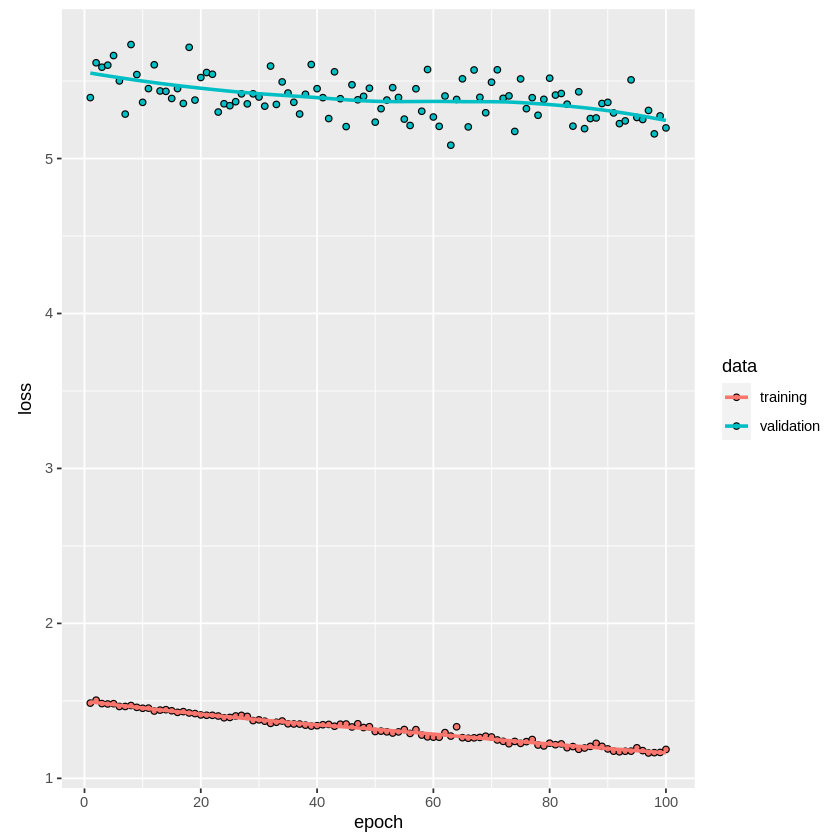

In [19]:
plot(history)

### Prediction

In [20]:
test_results <- list()

test_results[['dnn_model']] <- dnn_model %>% evaluate(
  as.matrix(test_features),
  as.matrix(test_labels),
  verbose = 0
)

In [ ]:
test_results

ERROR: ignored

In [21]:
test_labels$Pred.SOC <- as.data.frame(predict(dnn_model, as.matrix(test_features)))

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


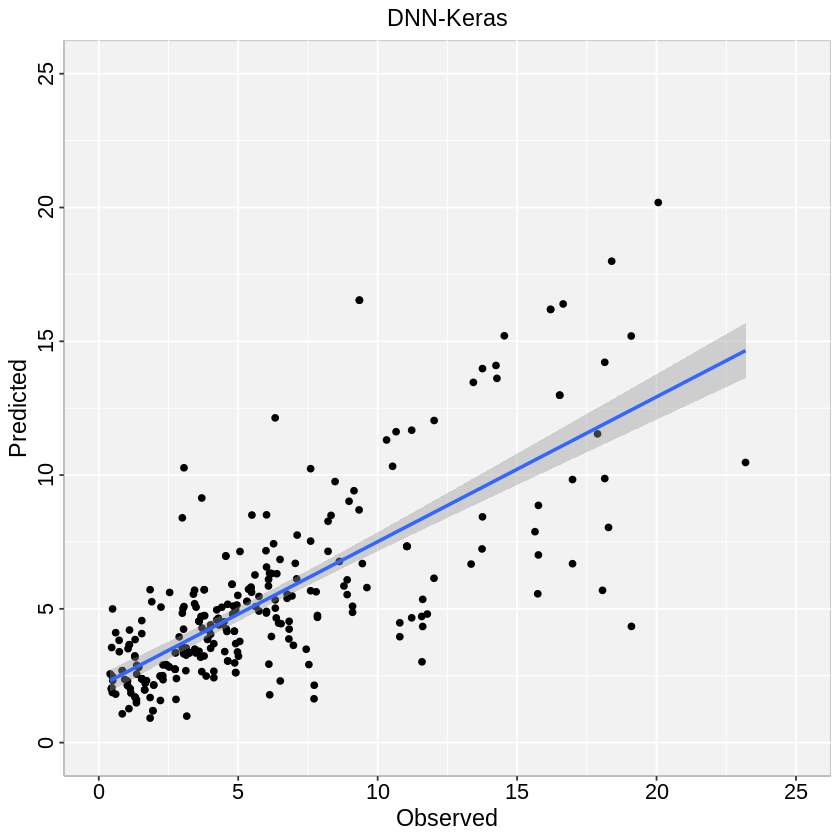

In [22]:

ggplot(test_labels, aes(SOC,Pred.SOC$V1)) +
  geom_point() +
  geom_smooth(method = "lm")+
  #stat_poly_eq(use_label(c("eq", "adj.R2")), formula = formula) +
  ggtitle("DNN-Keras") +
  xlab("Observed") + ylab("Predicted") +
  scale_x_continuous(limits=c(0,25), breaks=seq(0, 25, 5))+
  scale_y_continuous(limits=c(0,25), breaks=seq(0, 25, 5)) +
  # Flip the bars
  theme(
    panel.background = element_rect(fill = "grey95",colour = "gray75",size = 0.5, linetype = "solid"),
    axis.line = element_line(colour = "grey"),
    plot.title = element_text(size = 14, hjust = 0.5),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    axis.text.x=element_text(size=13, colour="black"),
    axis.text.y=element_text(size=13,angle = 90,vjust = 0.5, hjust=0.5, colour='black'))

## Tuning Keras-DNN with Tidymodel

#### Data split

The data set (n = 1408) will randomly split into sub-sets for training (70%), validation (15%) and test data (15%). The validation data will be used to optimized the model parameters during the tuning and training processes. The test data set will be used as the hold-out data to evaluate the DNN model.

In [23]:
set.seed(1245)   # for reproducibility
library(tidymodels)
split <- initial_split(df, prop = 0.8, strata = SOC)
train <- split %>% training()
test <-  split %>% testing()

#### Data Prepprocessing

In [24]:
dnn_recipe <-
  recipe(SOC ~ ., data = train) %>%
  step_zv(all_predictors()) %>%
  step_dummy(all_nominal()) %>%
  step_normalize(all_numeric_predictors())

# For testing when we arrive at a final model:
test_normalized <- bake(prep(dnn_recipe), new_data = test, all_predictors())

# Set 10 fold cross-validation data set
cv_folds<- vfold_cv(train, v=5)

#### Specify tunable Hypermeters of Keras - DNN

In [25]:
dnn_model <-
  mlp(mode = "regression",
      hidden_units = tune(),
      dropout = tune(),
      epochs = tune(),
      activation = "relu",
      ) %>%
      set_engine("keras",
                 verbose = 0,
                 optimizer = optimizer_adam(0.001),
                 validation = .10)

dnn_model

Single Layer Neural Network Model Specification (regression)

Main Arguments:
  hidden_units = tune()
  dropout = tune()
  epochs = tune()
  activation = relu

Engine-Specific Arguments:
  verbose = 0
  optimizer = optimizer_adam(0.001)
  validation = 0.1

Computational engine: keras 


#### Create Workflow

In [26]:
dnn_wf <- workflow() %>%
    add_model(dnn_model) %>%
    add_recipe(dnn_recipe)

dnn_wf

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: mlp()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_zv()
• step_dummy()
• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────
Single Layer Neural Network Model Specification (regression)

Main Arguments:
  hidden_units = tune()
  dropout = tune()
  epochs = tune()
  activation = relu

Engine-Specific Arguments:
  verbose = 0
  optimizer = optimizer_adam(0.001)
  validation = 0.1

Computational engine: keras 


#### Define random grid prameters

In [27]:
dnn_grid <- parameters(dnn_model) %>%
    finalize(train) %>%
    grid_random(size = 10)
head(dnn_grid)

Warning message:
“`parameters.model_spec()` was deprecated in tune 0.1.6.9003.
ℹ Please use `hardhat::extract_parameter_set_dials()` instead.”


hidden_units,dropout,epochs
<int>,<dbl>,<int>
1,0.0007954377,125
10,0.5150716361,557
9,0.4143820363,345
5,0.0477566177,811
2,0.8955254562,20
2,0.6345333899,684


#### Tune Grid

In [28]:
set.seed(345)
# grid search
dnn_tune_grid <- dnn_wf %>%
    tune_grid(
        resamples = cv_folds,
        grid = dnn_grid,
        control = control_grid(verbose = F),
        metrics = metric_set(rmse, rsq, mae)
    )

→ A | warning: A correlation computation is required, but `estimate` is constant and has 0 standard deviation, resulting in a divide by 0 error. `NA` will be returned.

There were issues with some computations   A: x1

There were issues with some computations   A: x2

There were issues with some computations   A: x3

There were issues with some computations   A: x4

There were issues with some computations   A: x4





### The best DNN model

In [29]:
best_rmse <- select_best(dnn_tune_grid , "rmse")

dnn_final <- finalize_model(
  dnn_model,
  best_rmse
)

dnn_final

Single Layer Neural Network Model Specification (regression)

Main Arguments:
  hidden_units = 5
  dropout = 0.0477566176559776
  epochs = 811
  activation = relu

Engine-Specific Arguments:
  verbose = 0
  optimizer = optimizer_adam(0.001)
  validation = 0.1

Computational engine: keras 


### Fit DNN model

In [32]:
final_fit <- fit(dnn_final, SOC ~ ., data = train)

### Prediction

In [33]:
test$SOC.pred = predict(final_fit, test)

In [38]:
install.packages("Metrics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [39]:
RMSE<- Metrics::rmse(test$SOC, test$SOC.pred$.pred)
RMSE

[1] 3.7849

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


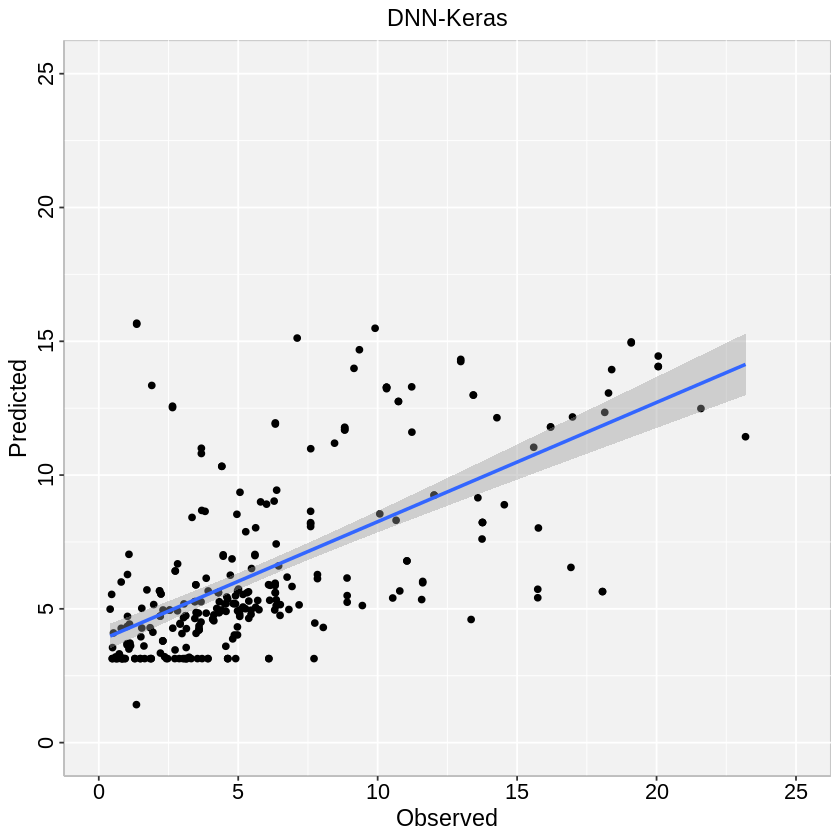

In [43]:

ggplot(test, aes(SOC,SOC.pred$.pred)) +
  geom_point() +
  geom_smooth(method = "lm")+
   ggtitle("DNN-Keras") +
  xlab("Observed") + ylab("Predicted") +
  scale_x_continuous(limits=c(0,25), breaks=seq(0, 25, 5))+
  scale_y_continuous(limits=c(0,25), breaks=seq(0, 25, 5)) +
  # Flip the bars
  theme(
    panel.background = element_rect(fill = "grey95",colour = "gray75",size = 0.5, linetype = "solid"),
    axis.line = element_line(colour = "grey"),
    plot.title = element_text(size = 14, hjust = 0.5),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    axis.text.x=element_text(size=13, colour="black"),
    axis.text.y=element_text(size=13,angle = 90,vjust = 0.5, hjust=0.5, colour='black'))